Purpose of this notebook is to demonstrate the process of getting optimal cutoff (based on Youden index) from training ROC, and generating performance metrics based on the selected cutoff for test predictions. This can be used for  CV fold or holdout testing in the similar way.

In [35]:
import pickle
from generate_report import get_optimal_cutoff, get_pred_report, evalplots, class_report
import pandas as pd

Load the true labels and predicted probabilities in the train and test sets.

In [36]:
#with open('training coyote label.csv','rb') as f:
    #data = pickle.load(f,encoding='bytes')
data1 = pd.read_csv('C:/EEG_project/coyote/training coyote label.csv')
data2 = pd.read_csv('C:/EEG_project/coyote/training coyote prob.csv')
data3 = pd.read_csv('C:/EEG_project/coyote/testing coyote label.csv')
data4 = pd.read_csv('C:/EEG_project/coyote/testing coyote prob.csv')

In [41]:
data4['mange']

0      0.009146
1      0.011844
2      0.697892
3      0.007382
4      0.010674
         ...   
213    0.018902
214    0.009273
215    0.049477
216    0.005915
217    0.058262
Name: mange, Length: 218, dtype: float64

In [42]:
#data['train_y_true']
pd.read_csv('C:/EEG_project/coyote/training coyote label.csv')

,mange
0,0
1,0
2,0
3,0
4,0
...,...
3633,0
3634,0
3635,0
3636,0


In [43]:
train_y_true = data1
train_y_prob = data2
test_y_true = data3
test_y_prob = data4
text_labels = train_y_true.columns.tolist()
test_y_prob.head()

,mange
0,0.009146
1,0.011844
2,0.697892
3,0.007382
4,0.010674


In [44]:
train_y_true

,mange
0,0
1,0
2,0
3,0
4,0
...,...
3633,0
3634,0
3635,0
3636,0


Get the optimal cutoff point and generate the pred report

In [45]:
# Use the train_y to generate the optimal cutoff point
_,_, _, _, roc_j_thr_dict = get_optimal_cutoff(train_y_true.to_numpy(),train_y_prob.to_numpy(), text_labels)
# Use the test_y to generate report
class_df_dict, creport_dict = get_pred_report(test_y_true.to_numpy(),test_y_prob.to_numpy(),text_labels,roc_j_thr_dict, verbose=False) # verbose = False

**mange**

Cutoff Probability based on Training ROC:  0.7344801
----------------------------------------


class_df_dict provides binarized test predictions using test probabilities based on optimal cutoff.

In [48]:
class_df_dict['mange']

,true,pred_proba,pred
0,0,0.009146,0
1,0,0.011844,0
2,0,0.697892,0
3,0,0.007382,0
4,0,0.010674,0
...,...,...,...
213,0,0.018902,0
214,0,0.009273,0
215,0,0.049477,0
216,0,0.005915,0


creport_dict provides a dictionary of various performance metrics for the test predictions (accuracy, auroc, auprc, f1_score, prec, rec, spec, aprec, br_score, tn, fp, fn, tp)

In [47]:
creport_dict['mange']

{'accuracy': 0.963302752293578,
 'auroc': 0.704225352112676,
 'auprc': 0.20917431192660552,
 'f1_score': 0.20000000000000004,
 'prec': 0.2,
 'rec': 0.2,
 'spec': 0.9812206572769953,
 'aprec': 0.2513437146538966,
 'br_score': 0.05413551672942252,
 'tn': 209,
 'fp': 4,
 'fn': 4,
 'tp': 1}

**mange**

Cutoff Probability based on Training ROC:  0.7344801
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       213
           1       0.20      0.20      0.20         5

    accuracy                           0.96       218
   macro avg       0.59      0.59      0.59       218
weighted avg       0.96      0.96      0.96       218

AUROC score: 0.7042
AUPRC score: 0.2092
Average precision-recall score: 0.2513
Accuracy score: 0.9633
Sensitivity / Recall score: 0.2000
Specificity score: 0.9812
Positive predictive value / Precision score: 0.2000
f1 score: 0.2000
Brier score: 0.0541



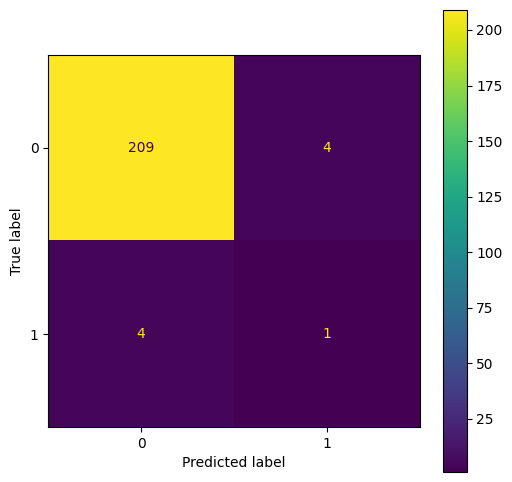

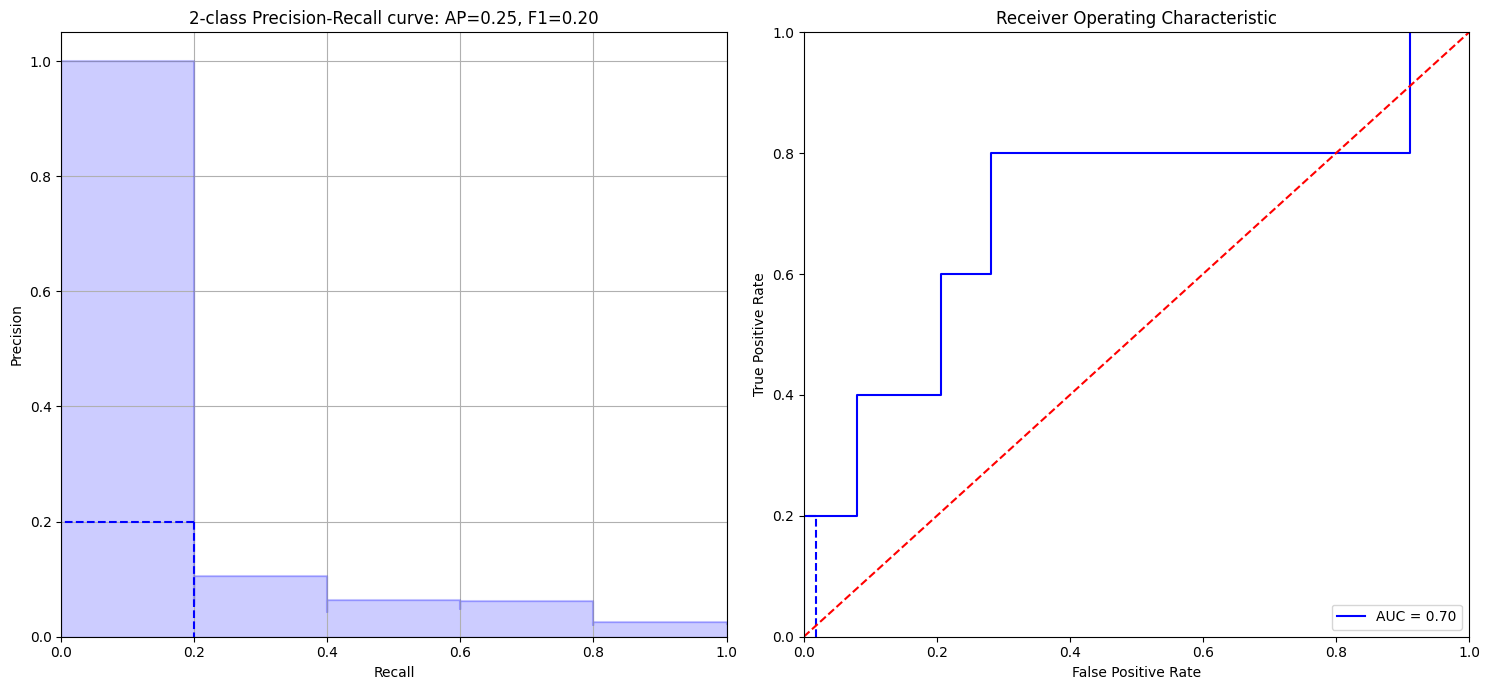

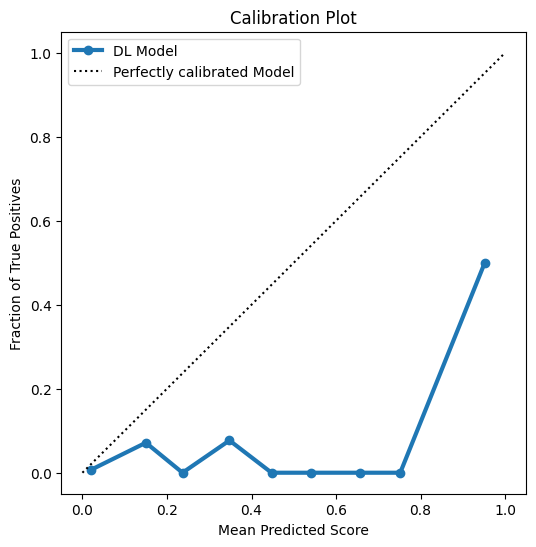

----------------------------------------


In [46]:
class_df_dict, creport_dict = get_pred_report(test_y_true.to_numpy(),test_y_prob.to_numpy(),text_labels,roc_j_thr_dict, verbose=True) # verbose = True